In [8]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

In [6]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [21]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [23]:
Base = automap_base()
Base.prepare(engine, reflect=True)

In [24]:
Base.classes.keys()

['measurement', 'station']

In [25]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [26]:
session = Session(engine)

In [27]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [31]:
# Print the column names and types from the station table
station_columns = inspector.get_columns('station')
[f"Name: {x['name']}; Type: {x['type']}" for x in inspector.get_columns('station')]

['Name: id; Type: INTEGER',
 'Name: station; Type: TEXT',
 'Name: name; Type: TEXT',
 'Name: latitude; Type: FLOAT',
 'Name: longitude; Type: FLOAT',
 'Name: elevation; Type: FLOAT']

In [32]:
# Display the first 5 rows from the station table
engine.execute('select * from station limit 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [33]:
# Print the column names and types from the measurement table
measurement_columns = inspector.get_columns('measurement')
[f"Name: {x['name']}; Type: {x['type']}" for x in inspector.get_columns('measurement')]

['Name: id; Type: INTEGER',
 'Name: station; Type: TEXT',
 'Name: date; Type: TEXT',
 'Name: prcp; Type: FLOAT',
 'Name: tobs; Type: FLOAT']

In [34]:
# Display the first 5 rows from the measurement table
engine.execute('select * from measurement limit 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [42]:
# Determine the last date of measurement table
Measurement_Last_Date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
Measurement_Last_Date

('2017-08-23')

In [43]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
Measurement_Year = session.query(Measurement.date, Measurement.prcp).filter((Measurement.date >= '2016-08-23') & (Measurement.date <= '2017-08-23')).order_by(Measurement.date.asc()).all()
Measurement_Year

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [44]:
# Calculate the date 1 year ago from the last data point in the database
Measurement_Year_Ago = dt.date(2017,8,23) - dt.timedelta(days=365)
Measurement_Year_Ago

datetime.date(2016, 8, 23)

In [45]:
# Perform a query to retrieve the data and precipitation scores
Measurement_Date_Score = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.asc()).all()
Measurement_Date_Score

[('2010-01-01', 0.08),
 ('2010-01-01', 0.28),
 ('2010-01-01', 0.21),
 ('2010-01-01', 0.15),
 ('2010-01-01', 0.15),
 ('2010-01-01', 0.05),
 ('2010-01-01', 0.14),
 ('2010-01-02', 0.0),
 ('2010-01-02', 0.0),
 ('2010-01-02', 0.02),
 ('2010-01-02', 0.0),
 ('2010-01-02', 0.0),
 ('2010-01-02', 0.0),
 ('2010-01-02', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-04', 0.01),
 ('2010-01-04', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-05', 0.0),
 ('2010-01-05', 0.02),
 ('2010-01-05', 0.01),
 ('2010-01-05', 0.0),
 ('2010-01-05', 0.0),
 ('2010-01-05', 0.0),
 ('2010-01-06', None),
 ('2010-01-06', 0.02),
 ('2010-01-06', 0.11),
 ('2010-01-06', 0.01),
 ('2010-01-06', 0.08),
 ('2010-01-06', 0.36),
 ('2010-01-07', 0.06),
 ('2010-01-07', 0.38),
 ('2010-01-07', None),
 ('2010-01-07', 0.7),
 ('2010-01-0

In [41]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(measurement_date_score).dropna()
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df

,prcp
date,
2010-01-01,0.08
2010-01-01,0.28
2010-01-01,0.21
2010-01-01,0.15
2010-01-01,0.15
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [47]:
# Sort the dataframe by date
DfYear = pd.DataFrame(measurement_year).dropna()
DfYear['date'] = pd.to_datetime(DfYear['date'])
DfYear = DfYear.set_index('date')
DfYear

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [48]:
DfYear.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2021 entries, 2016-08-23 to 2017-08-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   prcp    2021 non-null   float64
dtypes: float64(1)
memory usage: 31.6 KB


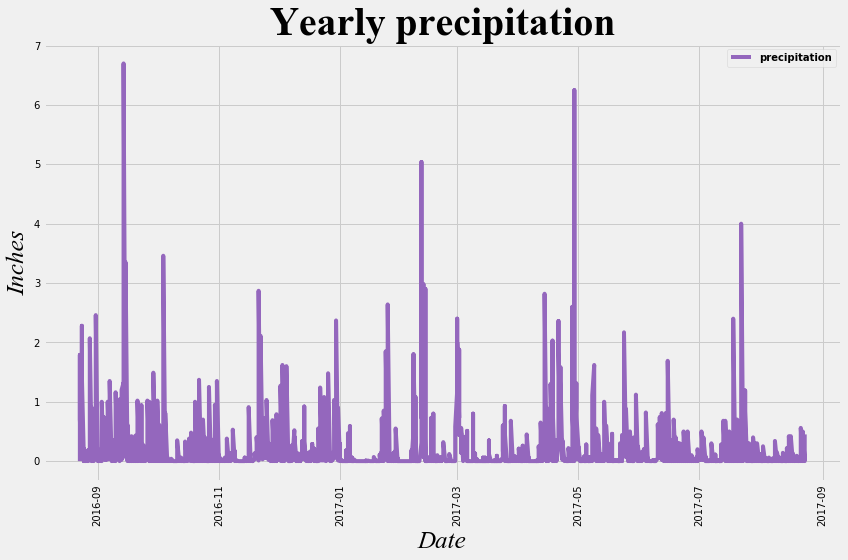

In [51]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize = (12,8))
plt.plot(DfYear,color ='tab:purple')
plt.xticks(rotation = 'vertical',fontsize = 10)
plt.yticks(np.arange(0,8,step = 1),fontsize = 10)
plt.title('Yearly precipitation',fontsize = 40, family = 'Times New Roman')
plt.xlabel('Date',style = 'italic',family = 'Times New Roman',fontsize = 25)
plt.ylabel('Inches',style = 'italic',family = 'Times New Roman',fontsize = 25)
plt.legend(['precipitation'],loc = 'best',prop = {'size': 10,'weight':'bold'})
plt.tight_layout()
plt.savefig('Precipitation_analysis.png')
plt.show()

In [52]:
# Use Pandas to calculate the summary statistics for the precipitation data
DfYear.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [53]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Measurement.station).distinct().count()
print(f'There are {station_count} stations in Hawaii.')

There are 9 stations in Hawaii.


In [54]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
StationActive = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
StationActive

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [55]:
# Determine the highest count station
HighestStationActive = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
HighestStationActive

('USC00519281', 2772)

In [57]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
Temperatures = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == HighestStationActive.station).all()
Temperatures

[(54.0, 85.0, 71.66378066378067)]

In [58]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station
HighestTemperatures = session.query(Measurement.tobs).filter(Measurement.station == HighestStationActive.station).filter(Measurement.date >= '2016-08-23').order_by(Measurement.date.desc()).all()
HighestTemperaturesDf = pd.DataFrame(HighestTemperatures)
HighestTemperaturesDf

,tobs
0,79.0
1,76.0
2,76.0
3,77.0
4,77.0
...,...
347,75.0
348,80.0
349,80.0
350,77.0


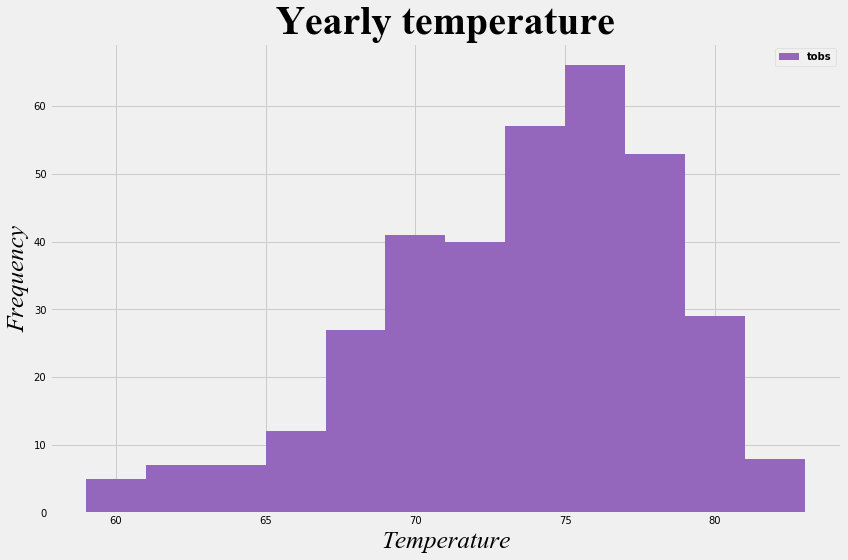

In [59]:
# Plot the results as a histogram
HighestTemperaturesDf.plot.hist(bins = 12,figsize = (12,8),color = 'tab:purple')
plt.xticks(fontsize = 10)
plt.yticks(np.arange(0,70,step = 10),fontsize = 10)
plt.title("Yearly temperature",fontsize = 40, family = 'Times New Roman')
plt.xlabel("Temperature",style = 'italic',family = 'Times New Roman',fontsize = 25)
plt.ylabel("Frequency",style = 'italic',family = 'Times New Roman',fontsize = 25)
plt.legend(['tobs'],loc = 'best',prop = {'size': 10,'weight':'bold'})
plt.tight_layout()
plt.savefig('Station_analysis.png')
plt.show()

In [60]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_trip_date, end_trip_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_trip_date).filter(Measurement.date <= end_trip_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [61]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
# 10 days trip to Hawaii
StartTripDate = '2016-09-01'
EndTripDate = '2016-09-10'
HawaiiTrip = calc_temps(StartTripDate, EndTripDate)
HawaiiTrip 

[(73.0, 77.86666666666666, 84.0)]

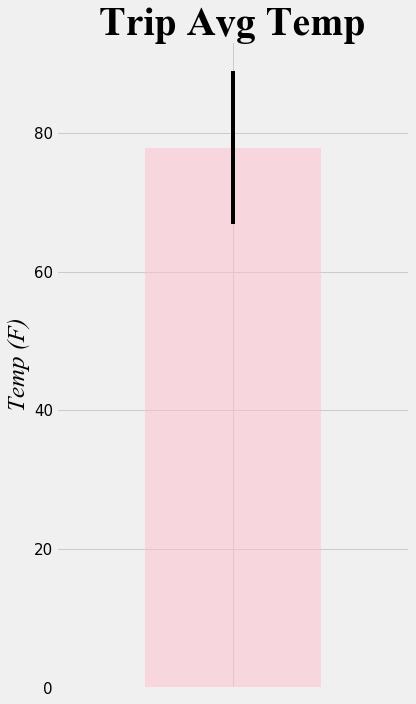

In [62]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
HawaiiTripDf = pd.DataFrame(HawaiiTrip, columns = ['TMIN', 'TAVG', 'TMAX'])
AverageTemperature = HawaiiTripDf['TAVG']
PeakToPeak = HawaiiTripDf.iloc[0]['TMAX'] - HawaiiTripDf.iloc[0]['TMIN']
AverageTemperature.plot.bar(yerr = PeakToPeak, figsize = (6,10), alpha = 0.5, color = 'pink')
plt.title('Trip Avg Temp',fontsize = 40, family = 'Times New Roman')
plt.ylabel('Temp (F)',style = 'italic',family = 'Times New Roman',fontsize = 25)
plt.yticks(np.arange(0,100,step = 20),fontsize = 15)
plt.tick_params(axis = ('x'), labelbottom = False)
plt.tight_layout()
plt.savefig('Temperature_analysis.png')
plt.show()

In [63]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
TripRainfallStation = session.query(Measurement.station,Station.name,Measurement.prcp,Station.latitude,Station.longitude,Station.elevation).group_by(Measurement.station).join(Station, Measurement.station == Station.station).filter(Measurement.date >= StartTripDate).filter(Measurement.date <= EndTripDate).order_by(Measurement.prcp).all()
TripRainfallStationDf = pd.DataFrame(TripRainfallStation)
TripRainfallStationDf

,station,name,prcp,latitude,longitude,elevation
0,USC00517948,"PEARL CITY, HI US",NaN,21.39340,-157.97510,11.9
1,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",NaN,21.33556,-157.71139,19.5
2,USC00513117,"KANEOHE 838.1, HI US",0.00,21.42340,-157.80150,14.6
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",0.00,21.52130,-157.83740,7.0
4,USC00519397,"WAIKIKI 717.2, HI US",0.00,21.27160,-157.81680,3.0
5,USC00516128,"MANOA LYON ARBO 785.2, HI US",0.01,21.33310,-157.80250,152.4
6,USC00519281,"WAIHEE 837.5, HI US",0.02,21.45167,-157.84889,32.9


In [67]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def DailyNormals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
DailyNormals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [69]:
# calculate the daily normals for your trip
TripDay1 = '09-01'
TripDay2 = '09-02'
TripDay3 = '09-03'
TripDay4 = '09-04'
TripDay5 = '09-05'
TripDay6 = '09-06'
TripDay7 = '09-07'
TripDay8 = '09-08'
TripDay9 = '09-09'
TripDay10 = '09-10'
TripNormalDay1 = DailyNormals(TripDay1)
TripNormalDay2 = DailyNormals(TripDay2)
TripNormalDay3 = DailyNormals(TripDay3)
TripNormalDay4 = DailyNormals(TripDay4)
TripNormalDay5 = DailyNormals(TripDay5)
TripNormalDay6 = DailyNormals(TripDay6)
TripNormalDay7 = DailyNormals(TripDay7)
TripNormalDay8 = DailyNormals(TripDay8)
TripNormalDay9 = DailyNormals(TripDay9)
TripNormalDay10 = DailyNormals(TripDay10)
TripNormalMinDay1 = TripNormalDay1[0][0]
TripNormalAvgDay1 = TripNormalDay1[0][1]
TripNormalMaxDay1 = TripNormalDay1[0][2]
TripNormalMinDay2 = TripNormalDay2[0][0]
TripNormalAvgDay2 = TripNormalDay2[0][1]
TripNormalMaxDay2 = TripNormalDay2[0][2]
TripNormalMinDay3 = TripNormalDay3[0][0]
TripNormalAvgDay3 = TripNormalDay3[0][1]
TripNormalMaxDay3 = TripNormalDay3[0][2]
TripNormalMinDay4 = TripNormalDay4[0][0]
TripNormalAvgDay4 = TripNormalDay4[0][1]
TripNormalMaxDay4 = TripNormalDay4[0][2]
TripNormalMinDay5 = TripNormalDay5[0][0]
TripNormalAvgDay5 = TripNormalDay5[0][1]
TripNormalMaxDay5 = TripNormalDay5[0][2]
TripNormalMinDay6 = TripNormalDay6[0][0]
TripNormalAvgDay6= TripNormalDay6[0][1]
TripNormalMaxDay6 = TripNormalDay6[0][2]
TripNormalMinDay7 = TripNormalDay7[0][0]
TripNormalAvgDay7 = TripNormalDay7[0][1]
TripNormalMaxDay7 = TripNormalDay7[0][2]
TripNormalMinDay8 = TripNormalDay8[0][0]
TripNormalAvgDay8 = TripNormalDay8[0][1]
TripNormalMaxDay8 = TripNormalDay8[0][2]
TripNormalMinDay9 = TripNormalDay9[0][0]
TripNormalAvgDay9 = TripNormalDay9[0][1]
TripNormalMaxDay9 = TripNormalDay9[0][2]
TripNormalMinDay10 = TripNormalDay10[0][0]
TripNormalAvgDay10 = TripNormalDay10[0][1]
TripNormalMaxDay10 = TripNormalDay10[0][2]

In [71]:
# push each tuple of calculations into a list called `normals`
NormalsList = pd.DataFrame({'Trip days':[TripDay1,TripDay2,TripDay3,TripDay4,TripDay5,TripDay6,TripDay7,TripDay8,TripDay9,TripDay10],
                             'Minimum temperature':[TripNormalMinDay1,TripNormalMinDay2,TripNormalMinDay3,TripNormalMinDay4,TripNormalMinDay5,TripNormalMinDay6,TripNormalMinDay7,TripNormalMinDay8,TripNormalMinDay9,TripNormalMinDay10],
                             'Average temperature':[TripNormalAvgDay1,TripNormalAvgDay2,TripNormalAvgDay3,TripNormalAvgDay4,TripNormalAvgDay5,TripNormalAvgDay6,TripNormalAvgDay7,TripNormalAvgDay8,TripNormalAvgDay9,TripNormalAvgDay10],
                             'Maximum temperature':[TripNormalMaxDay1,TripNormalMaxDay2,TripNormalMaxDay3,TripNormalMaxDay4,TripNormalMaxDay5,TripNormalMaxDay6,TripNormalMaxDay7,TripNormalMaxDay8,TripNormalMaxDay9,TripNormalMaxDay10]
    })
NormalsList

,Trip days,Minimum temperature,Average temperature,Maximum temperature
0,09-01,69.0,77.000000,82.0
1,09-02,67.0,76.666667,83.0
2,09-03,69.0,76.137255,83.0
3,09-04,68.0,76.270833,84.0
4,09-05,66.0,75.914894,84.0
5,09-06,66.0,74.911111,81.0
6,09-07,64.0,75.180000,82.0
7,09-08,66.0,76.222222,83.0
8,09-09,68.0,76.365385,84.0
9,09-10,67.0,76.612245,85.0


In [72]:
# Set the start and end date of the trip
StartTripDate = '2016-09-01'
EndTripDate = '2016-09-10'

In [73]:
# Use the start and end date to create a range of dates
TripRangeDate = session.query(Measurement.date).filter(Measurement.date >= StartTripDate).filter(Measurement.date <= EndTripDate).group_by(Measurement.date).all()
TripRangeDate

[('2016-09-01'),
 ('2016-09-02'),
 ('2016-09-03'),
 ('2016-09-04'),
 ('2016-09-05'),
 ('2016-09-06'),
 ('2016-09-07'),
 ('2016-09-08'),
 ('2016-09-09'),
 ('2016-09-10')]

In [74]:
# Stip off the year and save a list of %m-%d strings
TripDate = [t[0] for t in TripRangeDate]
TripDateStrip= [t[5:] for t in TripDate]
TripDateStrip

['09-01',
 '09-02',
 '09-03',
 '09-04',
 '09-05',
 '09-06',
 '09-07',
 '09-08',
 '09-09',
 '09-10']

In [75]:
StartTripDate = TripDateStrip[0]
EndTripDate = TripDateStrip[-1]

In [76]:
# Loop through the list of %m-%d strings and calculate the normals for each date
DayTripNormals = [session.query(func.min(Measurement.tobs),func.avg(Measurement.tobs),func.max(Measurement.tobs))
                    .filter(func.strftime("%m-%d", Measurement.date) >= StartTripDate)
                    .filter(func.strftime("%m-%d", Measurement.date) <= EndTripDate)
                    .group_by(func.strftime("%m-%d", Measurement.date)).all()]
DayTripNormals = DayTripNormals[0]
print("Daily Normals from 09-01 to 09-10")
DayTripNormals

Daily Normals from 09-01 to 09-10


[(69.0, 77.0, 82.0),
 (67.0, 76.66666666666667, 83.0),
 (69.0, 76.13725490196079, 83.0),
 (68.0, 76.27083333333333, 84.0),
 (66.0, 75.91489361702128, 84.0),
 (66.0, 74.91111111111111, 81.0),
 (64.0, 75.18, 82.0),
 (66.0, 76.22222222222223, 83.0),
 (68.0, 76.36538461538461, 84.0),
 (67.0, 76.61224489795919, 85.0)]

In [77]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
DayTripNormalsDf= pd.DataFrame(DayTripNormals,columns=['Minimum temperature','Average temperature', 'Maximum temperature'])
DayTripNormalsDf['Date']= TripDate
DayTripNormalsDf['Date'] = pd.to_datetime(DayTripNormalsDf['Date'],format='%Y-%m-%d')
DayTripNormalsDf.set_index('Date',inplace=True)
DayTripNormalsDf

,Minimum temperature,Average temperature,Maximum temperature
Date,,,
2016-09-01,69.0,77.000000,82.0
2016-09-02,67.0,76.666667,83.0
2016-09-03,69.0,76.137255,83.0
2016-09-04,68.0,76.270833,84.0
2016-09-05,66.0,75.914894,84.0
2016-09-06,66.0,74.911111,81.0
2016-09-07,64.0,75.180000,82.0
2016-09-08,66.0,76.222222,83.0
2016-09-09,68.0,76.365385,84.0


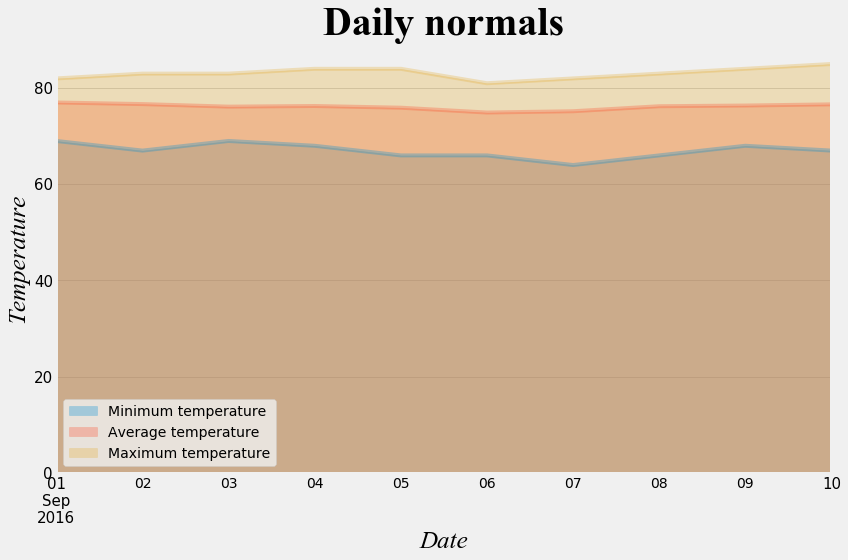

In [78]:
# Plot the daily normals as an area plot with `stacked=False`
DayTripNormalsDf.plot.area(stacked=False,figsize = (12,8),alpha=0.3)
plt.title('Daily normals',family = 'Times New Roman',fontsize = 40)
plt.ylabel('Temperature',style = 'italic',family = 'Times New Roman',fontsize = 25)
plt.xlabel('Date',style = 'italic',family = 'Times New Roman',fontsize = 25)
plt.yticks(np.arange(0,100,step = 20),fontsize = 15)
plt.xticks(fontsize = 15)
plt.tight_layout()
plt.savefig("Temperature_analysis2.png")
plt.show()